In [1]:
from utils.network import Network
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def sine_wave(graph: bool = False):
    ''' Create data as sine-wave to test for
        non-linearity

        Returns: NP.array sine wave
    '''
    sample_size = 100
    x_min = 0
    x_max = 2 * np.pi

    # Generate the x values
    x_values = np.linspace(x_min, x_max, sample_size)
    # Compute the y values using a non-linear function (e.g., sine)
    y_values = np.sin(x_values)
    # Combine x and y into a nested list of tuples
    dataset = np.array(list(zip(x_values, y_values)))
    if graph:
        plt.plot(dataset[:, 0], dataset[:, 1])
        plt.title('Input')
        plt.show()
    return dataset

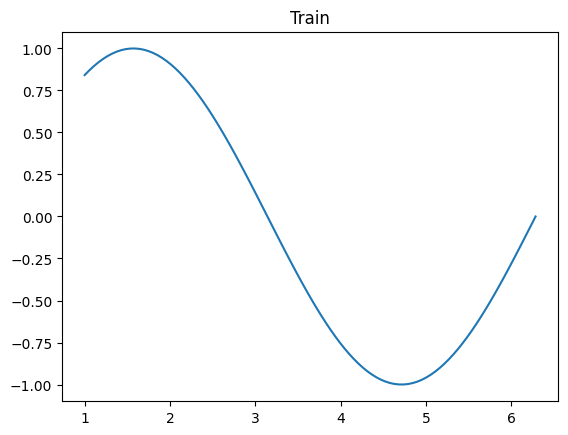

In [2]:
# Parameters
num_points = 100
test_size = 0.3
random_state = 42  # For reproducibility

# Generate dataset
x = np.linspace(1, 2*np.pi, num_points)
y = np.sin(x)

# # Define the range for x values
# x = np.linspace(-10, 10, 400)  # 400 points from -10 to 10

# # Define the nonlinear function, e.g., y = x^2
# y = x**2
plt.plot(x, y)
plt.title('Train')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=random_state)

training_data = np.array(list(zip(x, y)))

In [3]:
example_network = Network(dataset=training_data)
example_network.init_network(layers=2)
print(example_network.layers.values())
print('')
print(example_network.layers[0].neurons)

dict_values([<utils.layers.Layer object at 0x1129c5550>, <utils.layers.Layer object at 0x1330c4550>])

{0: <utils.neurons.Neuron object at 0x1332b3e10>, 1: <utils.neurons.Neuron object at 0x1332b3ed0>, 2: <utils.neurons.Neuron object at 0x129025a10>, 3: <utils.neurons.Neuron object at 0x1181de710>, 4: <utils.neurons.Neuron object at 0x13329cb90>, 5: <utils.neurons.Neuron object at 0x13260b4d0>, 6: <utils.neurons.Neuron object at 0x11ac1be90>, 7: <utils.neurons.Neuron object at 0x132bc9490>, 8: <utils.neurons.Neuron object at 0x132765c50>, 9: <utils.neurons.Neuron object at 0x11b1f1010>, 10: <utils.neurons.Neuron object at 0x1330c6f50>, 11: <utils.neurons.Neuron object at 0x1330c4190>, 12: <utils.neurons.Neuron object at 0x1330c42d0>, 13: <utils.neurons.Neuron object at 0x1330c4250>, 14: <utils.neurons.Neuron object at 0x1330c40d0>, 15: <utils.neurons.Neuron object at 0x1330c4090>, 16: <utils.neurons.Neuron object at 0x1330c4b10>, 17: <utils.neurons.Neuron object at 0x1330c4f50>, 18: <u

In [4]:
n1 = example_network.layers[0].neurons[1]
print(f'weights {n1.weights}')
print('')
print(f'signal {n1.signal}')
print(f'state {n1.state}')

weights [[0.0249307  0.1007701 ]
 [0.2356095  0.98891506]
 [0.83498408 0.56201335]]

signal 1.3350721876053477
state 1.1752365988961455


In [5]:
# iteration of neuron

# delta_signal = n1.feed_forward()
# res = n1.derivative()
# neuron_loss_grad = (delta_signal - n1.inputs_y)
# d_output_d_weights = res * n1.inputs_y.T
# gradient = neuron_loss_grad * d_output_d_weights
# print(gradient)
# print(n1.weights)
# print('')
# n1.weights -= n1.learning_rate * gradient
# print(n1.weights)
# n1.iterate()

In [6]:
example_network.train_network(epochs=10)

In [18]:
example_network.predict(training_data[0])

array([1.        , 0.84147098])

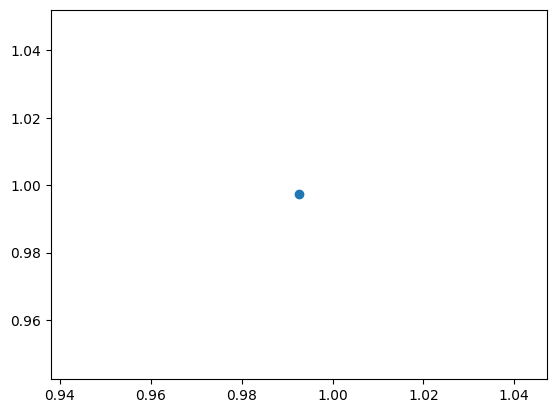

In [13]:
plt.scatter(n1.state, n1.signal)
plt.show()

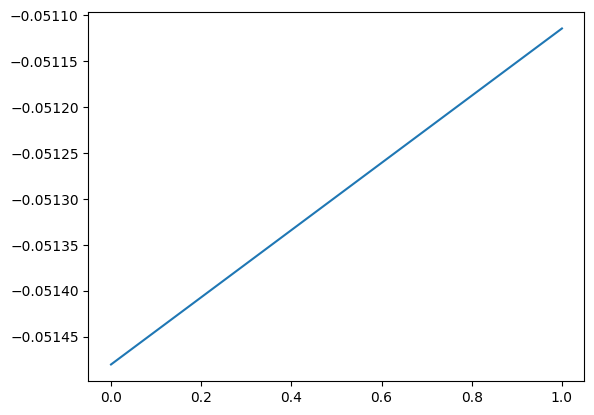

In [16]:
plt.plot(n1.loss_gradient)
plt.show()